In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv("brca.csv")

print(df.head())
print(df.info())

   Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0           1         13.540           14.36             87.46        566.3   
1           2         13.080           15.71             85.63        520.0   
2           3          9.504           12.44             60.34        273.9   
3           4         13.030           18.42             82.61        523.8   
4           5          8.196           16.84             51.71        201.9   

   x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0            0.09779             0.08129           0.06664   
1            0.10750             0.12700           0.04568   
2            0.10240             0.06492           0.02956   
3            0.08983             0.03766           0.02562   
4            0.08600             0.05943           0.01588   

   x.concave_pts_mean  x.symmetry_mean  ...  x.texture_worst  \
0            0.047810           0.1885  ...            19.26   
1            0.031100   

In [9]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.columns)


Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')


In [11]:
X = df.drop('y', axis=1)
y = df['y']


In [13]:
print(df['y'].unique())


['B' 'M']


In [15]:
y = y.map({'M': 0, 'B': 1})


In [16]:
X = df.drop('y', axis=1)
y = df['y']

# If categorical
if y.dtype == 'object':
    y = y.map({'M': 0, 'B': 1})


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (455, 30)
Testing size: (114, 30)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

linear_model = LinearSVC(max_iter=10000)

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

print("===== Linear SVM =====")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))


===== Linear SVM =====
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[41  2]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [22]:
from sklearn.svm import SVC

poly_model = SVC(kernel='poly', degree=3)

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

print("\n===== Polynomial SVM =====")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_poly))



===== Polynomial SVM =====
Accuracy: 0.9298245614035088
Confusion Matrix:
 [[35  8]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90        43
           1       0.90      1.00      0.95        71

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



(569, 31)
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64


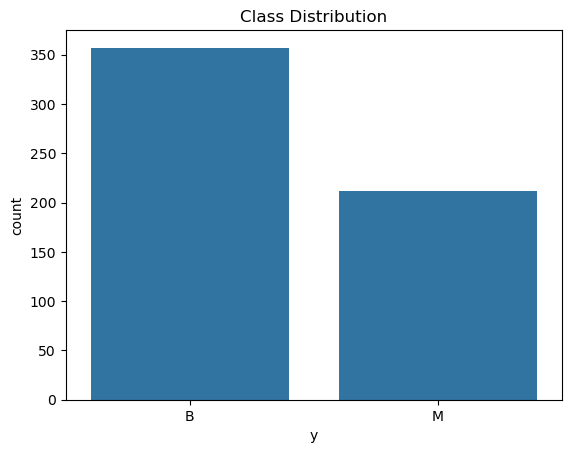

In [23]:
print(df.shape)
print(df.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df)
plt.title("Class Distribution")
plt.show()


In [24]:
importance = abs(linear_model.coef_[0])

feature_importance = pd.Series(importance, index=X.columns)
feature_importance.sort_values(ascending=False).head(10)


x.fractal_dim_se       1.038113
x.fractal_dim_worst    1.017462
x.radius_se            0.843170
x.texture_worst        0.786887
x.area_se              0.783522
x.concave_pts_mean     0.768956
x.concavity_worst      0.718131
x.area_worst           0.703913
x.concave_pts_se       0.696204
x.compactness_mean     0.613256
dtype: float64

In [25]:
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False
